# 1. Importing libraries

In [587]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [588]:
cityTemp_path = '/Users/ryumugil/Downloads/Achievement 6 Analysis'
cols_list = ['Region', 'Country', 'State', 'Month', 'Day', 'Year', 'AvgTemperature']
df_cityTemp_clean = pd.read_csv(os.path.join(cityTemp_path, '02 Data', 'Original data', 'city_temperature_cleaned.csv'))
df_cityTemp_clean = df_cityTemp_clean[df_cityTemp_clean['Year'].notna()]
df_cityTemp_clean = df_cityTemp_clean[df_cityTemp_clean['AvgTemperature'].notna()]

df_cityTemp_clean.head(20)

,Region,Country,State,City,Month,Day,Year,AvgTemperature
0,Africa,Algeria,NaN,Algiers,1.0,1.0,1995.0,64.2
1,Africa,Algeria,NaN,Algiers,1.0,2.0,1995.0,49.4
2,Africa,Algeria,NaN,Algiers,1.0,3.0,1995.0,48.8
3,Africa,Algeria,NaN,Algiers,1.0,4.0,1995.0,46.4
4,Africa,Algeria,NaN,Algiers,1.0,5.0,1995.0,47.9
5,Africa,Algeria,NaN,Algiers,1.0,6.0,1995.0,48.7
6,Africa,Algeria,NaN,Algiers,1.0,7.0,1995.0,48.9
7,Africa,Algeria,NaN,Algiers,1.0,8.0,1995.0,49.1
8,Africa,Algeria,NaN,Algiers,1.0,9.0,1995.0,49.0
9,Africa,Algeria,NaN,Algiers,1.0,10.0,1995.0,51.9


# 2. Data Cleaning

In [590]:
df_cityTemp_clean.columns

Index(['Region', 'Country', 'State', 'City', 'Month', 'Day', 'Year',
       'AvgTemperature'],
      dtype='object')

In [591]:
df_cityTemp_clean.shape

(999999, 8)

In [592]:
# Check for missing values

df_cityTemp_clean.isnull().sum()

Region                 1
Country                0
State             999999
City                   0
Month                  0
Day                    0
Year                   0
AvgTemperature         0
dtype: int64

In [593]:
# Duplicate check

dups = df_cityTemp_clean.duplicated()

In [594]:
df_cityTemp_clean['Year']

0         1995.0
1         1995.0
2         1995.0
3         1995.0
4         1995.0
           ...  
999994    2005.0
999995    2005.0
999996    2005.0
999997    2005.0
999998    2001.0
Name: Year, Length: 999999, dtype: float64

In [595]:
X = df_cityTemp_clean['Year'].dropna().values.reshape(-1,1)
y = df_cityTemp_clean['AvgTemperature'].dropna().values.reshape(-1,1)

In [596]:
df_cityTemp_clean.rename(columns = {'Region': 'Region', 'Country' :'State'}).drop(['State', 'City', 'Month', 'Day'], axis=1).drop([])

,Region,Year,AvgTemperature
0,Africa,1995.0,64.2
1,Africa,1995.0,49.4
2,Africa,1995.0,48.8
3,Africa,1995.0,46.4
4,Africa,1995.0,47.9
...,...,...,...
999994,Europe,2005.0,71.9
999995,Europe,2005.0,72.5
999996,Europe,2005.0,72.7
999997,Europe,2005.0,70.3


# 3. The Elbow technique

In [598]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [599]:
score = [kmeans[i].fit(X,y).score(X) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

[-1393098211.622182,
 -53071349.66550568,
 -13369658.264651153,
 -6160545.502865319,
 -3353049.0244537783,
 -2332066.9176641325,
 -1540416.2679974954,
 -1211811.8573777617,
 -836297.5623706898]

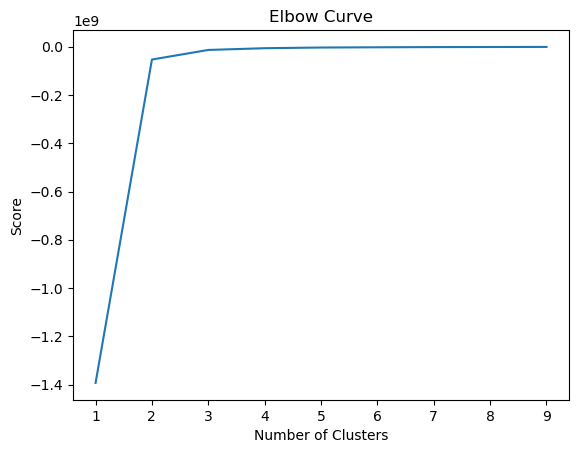

In [600]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

Based on the elbow curve, the optimal number of clusters for the k-means algorithm appears to be 2. This choice is informed by the sharp decrease in the score (inertia) from 1 to 2 clusters, followed by a much flatter decline thereafter. The "elbow" at 2 clusters indicates that adding more clusters beyond this point yields diminishing returns in reducing within-cluster variance, making 2 a practical and efficient choice.

# 4.  K-Means Clustering 

In [603]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3) 

In [604]:
# Fit the k-means object to the data.

kmeans.fit(X,y)

KMeans(n_clusters=3)

In [605]:
df_cityTemp_clean['clusters'] = kmeans.fit_predict(X)

df_cityTemp_clean

,Region,Country,State,City,Month,Day,Year,AvgTemperature,clusters
0,Africa,Algeria,NaN,Algiers,1.0,1.0,1995.0,64.2,2
1,Africa,Algeria,NaN,Algiers,1.0,2.0,1995.0,49.4,2
2,Africa,Algeria,NaN,Algiers,1.0,3.0,1995.0,48.8,2
3,Africa,Algeria,NaN,Algiers,1.0,4.0,1995.0,46.4,2
4,Africa,Algeria,NaN,Algiers,1.0,5.0,1995.0,47.9,2
...,...,...,...,...,...,...,...,...,...
999994,Europe,Yugoslavia,NaN,Belgrade,8.0,30.0,2005.0,71.9,2
999995,Europe,Yugoslavia,NaN,Belgrade,8.0,31.0,2005.0,72.5,2
999996,Europe,Yugoslavia,NaN,Belgrade,9.0,1.0,2005.0,72.7,2
999997,Europe,Yugoslavia,NaN,Belgrade,9.0,2.0,2005.0,70.3,2


In [606]:
df_cityTemp_clean['clusters'].value_counts()

clusters
2    536393
0    463195
1       411
Name: count, dtype: int64

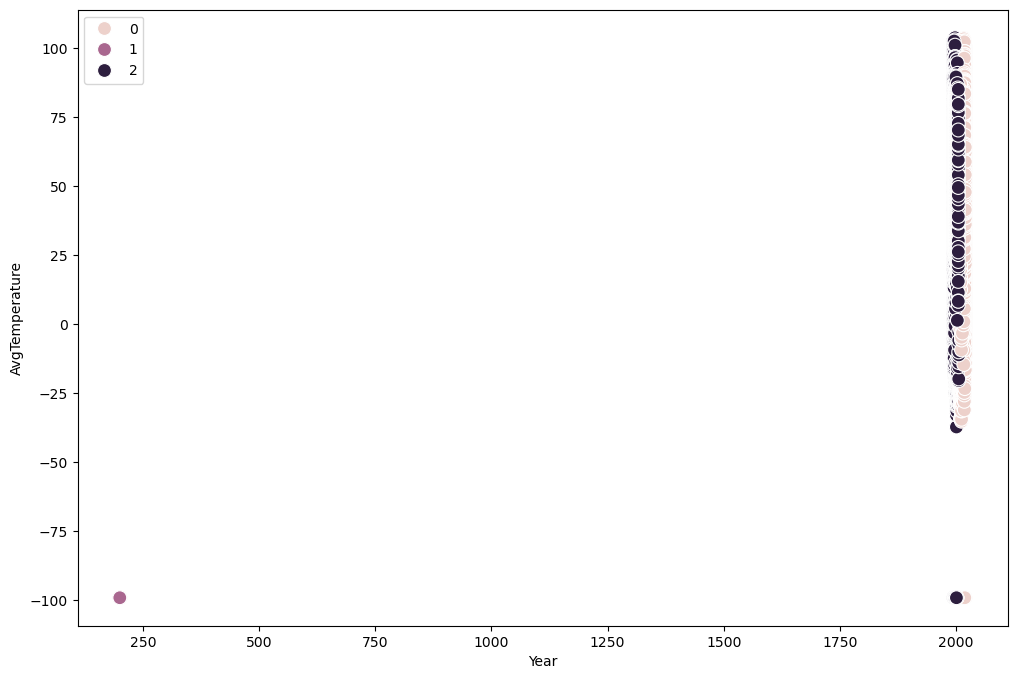

In [607]:
# Plot the clusters for "Year" and "AvgTemperature"  variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_cityTemp_clean['Year'], y=df_cityTemp_clean['AvgTemperature'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Year') # Label x-axis.
plt.ylabel('AvgTemperature') # Label y-axis.
plt.show()

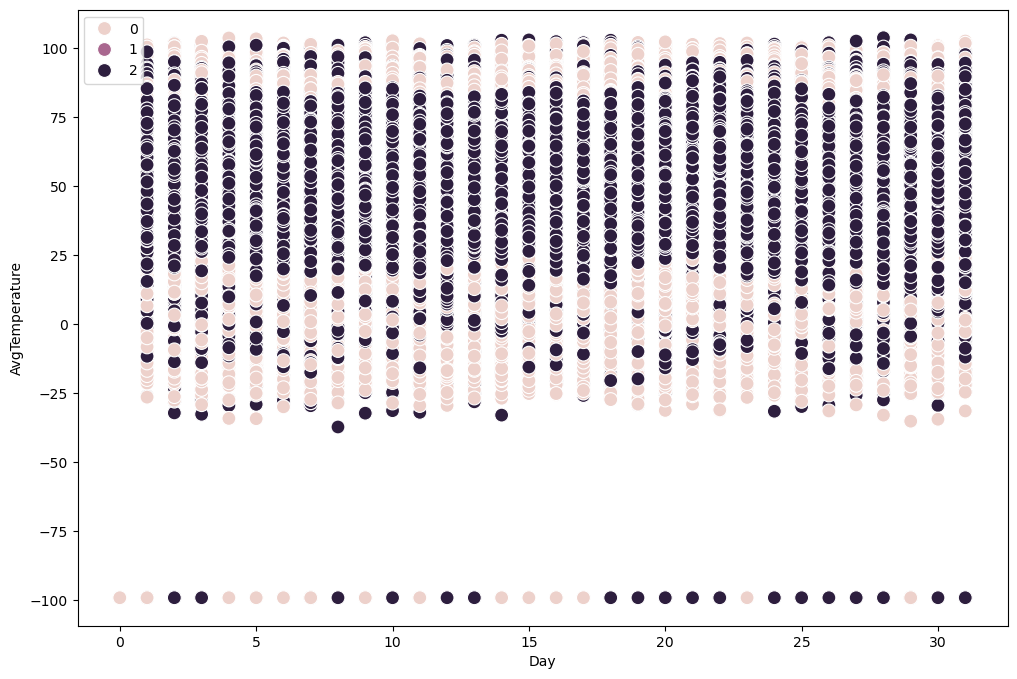

In [608]:
# Plot the clusters for the "Day" and "AvgTemperature" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_cityTemp_clean['Day'], y=df_cityTemp_clean['AvgTemperature'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Day') 
plt.ylabel('AvgTemperature') 
plt.show()

Both distribution make sense based on the clusters, of which 'Year', 'Day', and 'AvgTemperature'. In the 'Year' vs. 'AvgTemperature' plot, three clusters (0, 1, 2) separate data into distinct groups: Cluster 0 (pink) for higher temperatures around 1500-2000 years, Cluster 1 (purple) for mid-range values, and Cluster 2 (black) for extreme lows, reflecting possible temporal or data quality variations. In the 'Day' vs. 'AvgTemperature' plot, the clusters align with daily temperature patterns: Cluster 0 (pink) for warmer days, Cluster 1 (purple) for moderate days, and Cluster 2 (black) for colder days, which is logical given daily climatic cycles. The clustering is meaningful as it captures both temporal and daily temperature trends effectively.

# 5. Descriptive Statistics groupby()

In [612]:
df_cityTemp_clean.loc[df_cityTemp_clean['clusters'] == 2, 'cluster'] = 'dark purple'
df_cityTemp_clean.loc[df_cityTemp_clean['clusters'] == 1, 'cluster'] = 'purple'
df_cityTemp_clean.loc[df_cityTemp_clean['clusters'] == 0, 'cluster'] = 'pink'

In [614]:
df_cityTemp_clean.groupby('cluster').agg({'Month':['mean', 'median'], 
                         'Day':['mean', 'median'], 
                         'Year':['mean', 'median'],
                          'AvgTemperature':['mean', 'median']})

Month               Day                Year          \
                  mean median       mean median         mean  median   
cluster                                                                
dark purple   6.519274    7.0  15.728483   16.0  2000.955391  2001.0   
pink          6.410995    6.0  15.704831   16.0  2013.598579  2014.0   
purple       11.929440   12.0  16.742092   17.0   200.783455   201.0   

            AvgTemperature         
                      mean median  
cluster                            
dark purple      48.824222   62.7  
pink             60.576036   65.7  
purple          -99.000000  -99.0

The findings show three clusters with distinct characteristics. The 'dark purple' cluster has a mean temperature of 62.7°C, peaking in mid-2000 with a median month of 7. The 'pink' cluster, with a mean temperature of 65.7°C, centers around mid-2010 with a median month of 6. The 'purple' cluster stands out with a mean temperature of -99.0°C, likely indicating missing or erroneous data, centered around early 2010 with a median month of 12. The clusters suggest temperature variations tied to seasonal and yearly patterns, though the 'purple' cluster may reflect data quality issues.

# 6. Future Steps of an analytics pipeline

Data Cleaning: Identifying the 'purple' cluster (-99.0°C) to flag and correct erroneous or missing data.

Trend Analysis: Using 'dark purple' and 'pink' clusters to study seasonal temperature trends for forecasting.

Segmentation: Grouping regions or time periods for targeted climate studies or resource planning.

Model Refinement: Informing k-means parameter tuning or alternative clustering methods for better accuracy.